In [3]:
from PIL import Image
from IPython.display import Image as PIM
import matplotlib.pyplot as plt
import itertools
import skimage
import numpy as np

In [4]:
from moviepy.editor import ImageSequenceClip, AudioFileClip, VideoFileClip
from pathlib import Path

In [5]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [6]:
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

In [84]:
vid_path = '../simswap/SimSwap/output_sr_12.mp4'
#vid_path = '../simswap/input_kes3/IR_01_박은보.mp4'

In [85]:
res = []
lips_alpha = []
inter_lips_alpha = []
#LIPS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LIPS)))
LIPS_INDEXES = [164, 393, 391, 322, 410, 287, 273, 335, 406, 313, 18, 83, 182, 106, 43, 57, 186, 92, 165, 167]
INTER_LIPS_INDEXES = [0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146, 61, 185, 40, 39, 37]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(vid_path)
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    idx = 0
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break
        # if idx > 35:
        #     break
        #image = cv2.resize(image, (3840,2160))
        
        #image = image[270:2160-270*3, 960:3840-960]
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        # Draw the face mesh annotations on the image.
        image.flags.writeable = True
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            cords = []
            for face_landmarks in results.multi_face_landmarks:
                for lip_id in LIPS_INDEXES:
                    lid = face_landmarks.landmark[lip_id]
                    #cord = _normalized_to_pixel_coordinates(lid.x,lid.y,image.shape[1],image.shape[0])
                    cords.append(_normalized_to_pixel_coordinates(lid.x,lid.y,image.shape[1],image.shape[0]))
                    xs = list(zip(*cords))[0]
                    ys = list(zip(*cords))[1]
                    _len = len(xs)
                    cx = (max(xs) + min(xs)) / 2
                    cy = (max(ys) + min(ys)) / 2
                    lx = (max(xs) - min(xs)) / 2
                    ly = (max(ys) - min(ys)) / 2
                    Y, X = skimage.draw.polygon(ys, xs)
                cropped_img = np.zeros(image.shape, dtype=np.uint8)
                for i in range(len(X)):
                    cropped_img[Y[i], X[i]] = min( (max((ly - abs(cy-Y[i])), 0)/ly)*255, (max((lx - abs(cx-X[i])), 0)/lx)*255 )
                    #cropped_img[Y[i], X[i]] = np.sqrt( np.square((max((ly - abs(cy-Y[i])), 0)/ly)*255) + np.square((max((lx - abs(cx-X[i])), 0)/lx)*255) )
            lips_alpha.append(cropped_img)
            cords = []
            for face_landmarks in results.multi_face_landmarks:
                for lip_id in INTER_LIPS_INDEXES:
                    lid = face_landmarks.landmark[lip_id]
                    #cord = _normalized_to_pixel_coordinates(lid.x,lid.y,image.shape[1],image.shape[0])
                    cords.append(_normalized_to_pixel_coordinates(lid.x,lid.y,image.shape[1],image.shape[0]))
                    Y, X = skimage.draw.polygon(list(zip(*cords))[1], list(zip(*cords))[0])
                cropped_img = np.zeros(image.shape, dtype=np.uint8)
                cropped_img[Y, X] = 255 #image[Y, X]
            inter_lips_alpha.append(cropped_img)
        else:
            print("no lips")
            lips_alpha.append(np.zeros(image.shape, dtype=np.uint8))
            inter_lips_alpha.append(np.zeros(image.shape, dtype=np.uint8))
        res.append(image)
        idx += 1
            
cap.release()

no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips
no lips


In [47]:
image[270:2160-270*3, 960:3840-960].shape

(1080, 1920, 3)

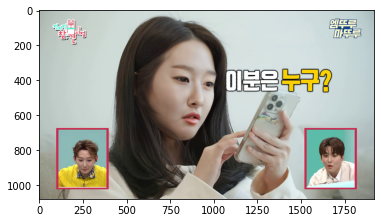

In [86]:
plt.imshow(res[test_idx])

In [87]:
#vid_path = '../simswap/output/pwb_demo_00007_yes.mp4'
#vid_path = '../simswap/input_kes7/temp_07.mp4'
vid_path = '../simswap/input_jyh/jyh_original.mp4'

In [88]:
res_over = []
cap = cv2.VideoCapture(vid_path)
while cap.isOpened():
    success, image = cap.read()
    if not success:
        break
    image = cv2.resize(image, (1920,1080))
    #image = image[270:2160-270*3, 960:3840-960]
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image.flags.writeable = True

    res_over.append(image)
            
cap.release()

In [89]:
len(res_over)

725

In [90]:
len(lips_alpha)

725

In [91]:
test_idx = 40

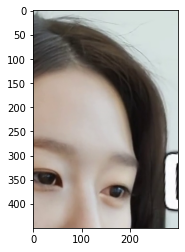

In [92]:
plt.imshow(res[test_idx][50:500,800:1100])

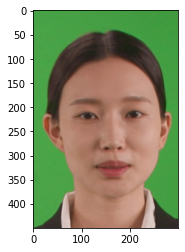

In [58]:
plt.imshow(res_over[test_idx][50:500,800:1100])

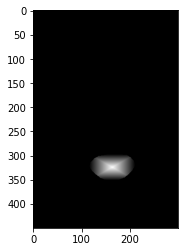

In [59]:
#plt.imshow(lips_alpha[test_idx][160:440,880:1080])
plt.imshow(lips_alpha[test_idx][50:500,800:1100])
#plt.imshow(lips_alpha[test_idx])

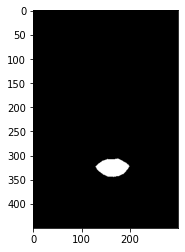

In [60]:
plt.imshow(inter_lips_alpha[test_idx][50:500,800:1100])

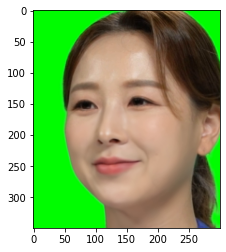

In [70]:
plt.imshow(res_over[test_idx][50:400,700:1000])

In [71]:
foreground = res_over[test_idx].astype(float)
background = res[test_idx].astype(float)
# Normalize the alpha mask to keep intensity between 0 and 1
alpha = (lips_alpha[test_idx].astype(float)/255)*0.3
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
temp_outImage = cv2.add(foreground, background)

background = cv2.add(foreground, background)
foreground = res_over[test_idx].astype(float)
alpha = (inter_lips_alpha[test_idx].astype(float)/255)*0.7
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
outImage = cv2.add(foreground, background)


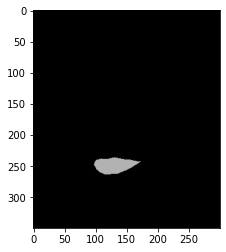

In [72]:
plt.imshow(alpha[50:400,700:1000])

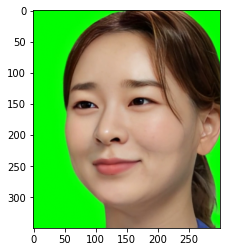

In [73]:
plt.imshow(outImage[50:400,700:1000]/255)

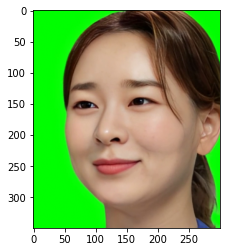

In [74]:
plt.imshow(temp_outImage[50:400,700:1000]/255)

In [93]:
blending_res = []
for idx in range(len(res)):
    foreground = res_over[idx].astype(float)
    background = res[idx].astype(float)
    # Normalize the alpha mask to keep intensity between 0 and 1
    alpha = (lips_alpha[idx].astype(float)/255)*0.3 #*0.6
    foreground = cv2.multiply(alpha, foreground)
    background = cv2.multiply(1.0 - alpha, background)
    temp_outImage = cv2.add(foreground, background)

    background = cv2.add(foreground, background)
    foreground = res_over[idx].astype(float)
    alpha = (inter_lips_alpha[idx].astype(float)/255)*0.7
    foreground = cv2.multiply(alpha, foreground)
    background = cv2.multiply(1.0 - alpha, background)
    outImage = cv2.add(foreground, background)
    blending_res.append(outImage)

In [ ]:
vid_path

In [94]:
vc = VideoFileClip(vid_path)
vc.audio.write_audiofile('temp_audio.wav')

MoviePy - Writing audio in temp_audio.wav


MoviePy - Done.


In [95]:
print(len(blending_res))

725


In [96]:
def write_video(composed, wav_path, fps, output_path, slow_write, verbose=False):
    duration = len(composed)/fps
    
    ac = AudioFileClip(wav_path)
    if verbose:
        print(ac.duration, duration, abs(ac.duration- duration))
    #assert(abs(ac.duration - duration) < 0.1)
    print(ac.duration, duration)
    
    clip = ImageSequenceClip(composed, fps=fps)
    #clip = clip.set_audio(ac.subclip(ac.duration-duration, ac.duration))
    h, w, _ = composed[0].shape
    if h > 1920:
        clip = clip.resize((w//2, h//2))

    ffmpeg_params = None
    if slow_write:
        ffmpeg_params=['-acodec', 'aac', '-preset', 'veryslow', '-crf', '17']
        
    temp_out = output_path
    Path(temp_out).parent.mkdir(exist_ok=True)
    if verbose:
        clip.write_videofile(temp_out, ffmpeg_params=ffmpeg_params)
    else:
        clip.write_videofile(temp_out, ffmpeg_params=ffmpeg_params, verbose=verbose, logger=None)
    
    clip.close()
    ac.close()
    del clip
    del ac

In [97]:
write_video(blending_res, 'temp_audio.wav', 29.97, 'output_vid/o.mp4', slow_write=False)

25.01 24.190857524190857


In [98]:
!ffmpeg -i temp_audio.wav -i output_vid/o.mp4 -map 0:a -map 1:v final_lr_10.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib